In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [42]:
market_sales = pd.read_csv(r"C:\Users\90535\Desktop\Ali Murat\Makine Öğrenme\VERİ\supermarket_sales - Sheet1.csv")

In [44]:
# Eksik verileri kontrol et
print("Eksik Veri Sayısı:")
market_sales.isnull().sum()

Eksik Veri Sayısı:


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [48]:
# Temel istatistiksel bilgileri görüntüleme
print("Temel İstatistik Bilgileri:")
market_sales.describe()

Temel İstatistik Bilgileri:


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


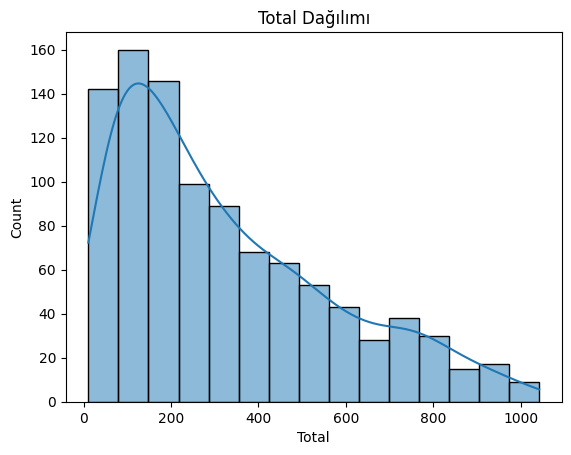

In [50]:
# 'Total' sütununun dağılımını görselleştirelim
sns.histplot(market_sales['Total'], kde=True)
plt.title('Total Dağılımı')  # Başlık ekleyelim
plt.show()

In [52]:
# 1. Sayısal Olmayan Sütunları Çıkarma (Sadece sayısal verilere ihtiyacımız var)
market_sales = market_sales.drop(columns=['Invoice ID'])

In [54]:
# 2. Kategorik Verileri Sayısal Hale Getirme
label_encoder = LabelEncoder()
market_sales['Gender'] = label_encoder.fit_transform(market_sales['Gender'])

# 'Payment' sütununu one-hot encoding ile sayısal hale getirelim
market_sales = pd.get_dummies(market_sales, columns=['Payment'], drop_first=True)  # 'drop_first=True' ile bir kategoriyi referans olarak alırız

In [58]:
# 3. Sadece Sayısal Değişkenlere Erişelim
numeric_df = market_sales.select_dtypes(include=['float64', 'int64'])

In [62]:
# 4. Korelasyon Matrisini Hesaplama
correlation_matrix = numeric_df.corr()
numeric_df.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


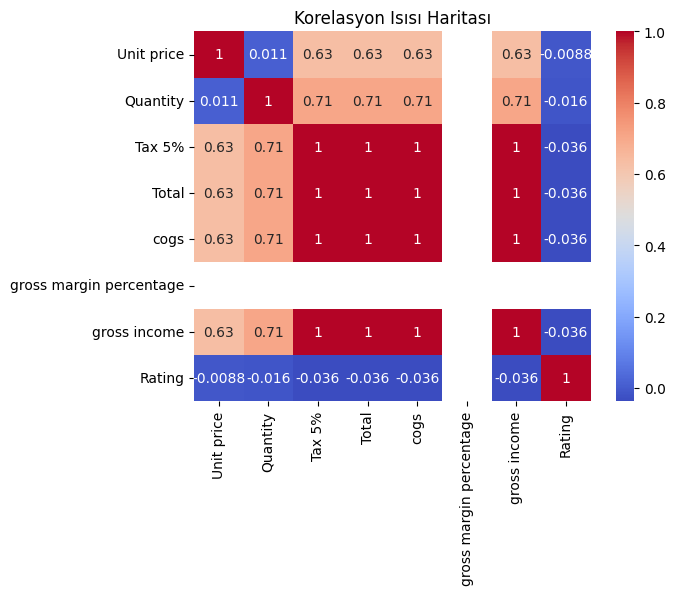

In [64]:
# 5. Korelasyon Isısı Haritasını Görselleştirme
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasyon Isısı Haritası')  # Başlık ekleyebiliriz
plt.show()

In [66]:
# Bağımsız değişkenler ve bağımlı değişkeni tanımlayalım
X = market_sales[['Unit price', 'Quantity', 'Tax 5%', 'cogs', 'gross margin percentage', 'gross income', 'Rating', 'Payment_Credit card', 'Payment_Ewallet']]
y = market_sales['Total']

In [68]:
# Eğitim ve Test Setlerine Ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# ===================================================================
# 1. Lineer Regresyon Modeli
# ===================================================================
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Tahmin ve Model Performansı
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("\nLineaer Regresyon Modeli:")
print("MSE:", mse_linear)
print("R^2 Skoru:", r2_linear)


Lineaer Regresyon Modeli:
MSE: 2.079658227216049e-26
R^2 Skoru: 1.0


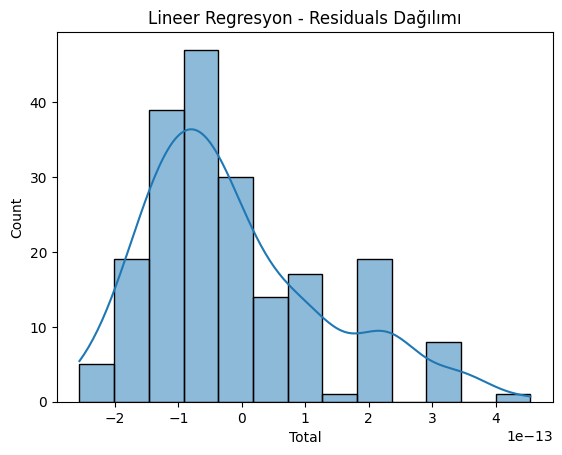

In [76]:
# Residuals Analizi - Lineer Regresyon
residuals_linear = y_test - y_pred_linear
sns.histplot(residuals_linear, kde=True)
plt.title('Lineer Regresyon - Residuals Dağılımı')
plt.show()

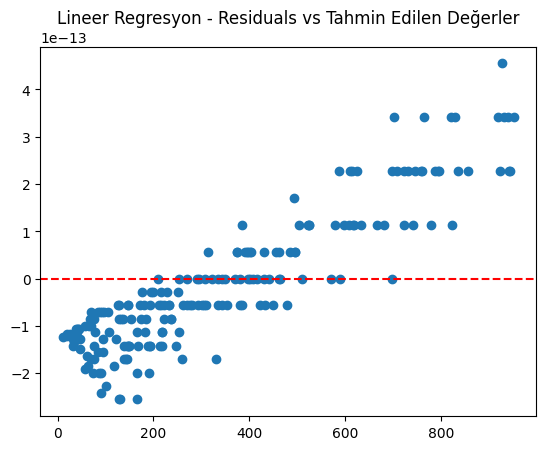

In [78]:
plt.scatter(y_pred_linear, residuals_linear)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Lineer Regresyon - Residuals vs Tahmin Edilen Değerler')
plt.show()

In [80]:
# ===================================================================
# 2. Ridge Regresyon Modeli
# ===================================================================
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nRidge Regresyon Modeli:")
print("MSE:", mse_ridge)
print("R^2 Skoru:", r2_ridge)


Ridge Regresyon Modeli:
MSE: 2.5921997730035625e-10
R^2 Skoru: 0.999999999999996


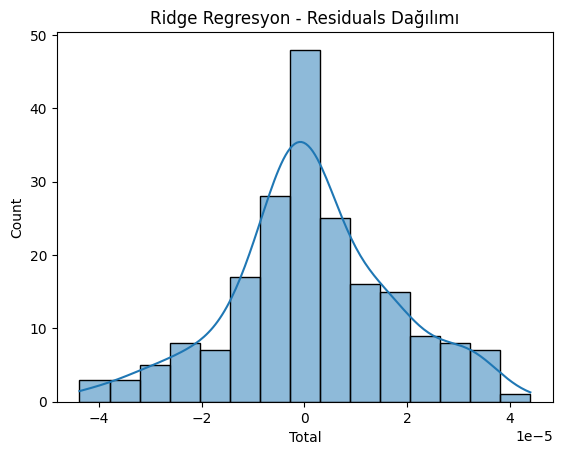

In [82]:
# Residuals Analizi - Ridge Regresyon
residuals_ridge = y_test - y_pred_ridge
sns.histplot(residuals_ridge, kde=True)
plt.title('Ridge Regresyon - Residuals Dağılımı')
plt.show()

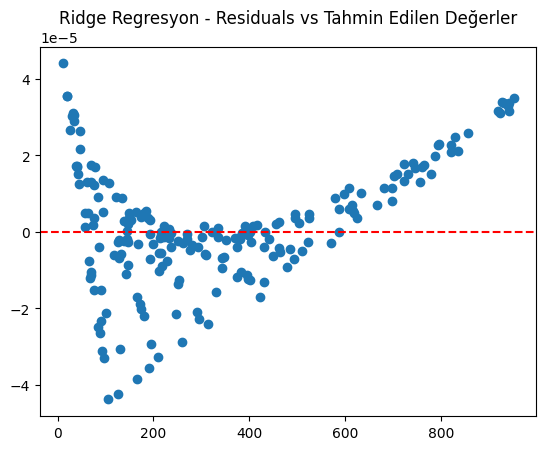

In [84]:
plt.scatter(y_pred_ridge, residuals_ridge)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Ridge Regresyon - Residuals vs Tahmin Edilen Değerler')
plt.show()

In [86]:
# ===================================================================
# 3. Random Forest Regresyon Modeli
# ===================================================================
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Modeli:")
print("MSE:", mse_rf)
print("R^2 Skoru:", r2_rf)


Random Forest Modeli:
MSE: 1.2131365367204707
R^2 Skoru: 0.9999813532882689


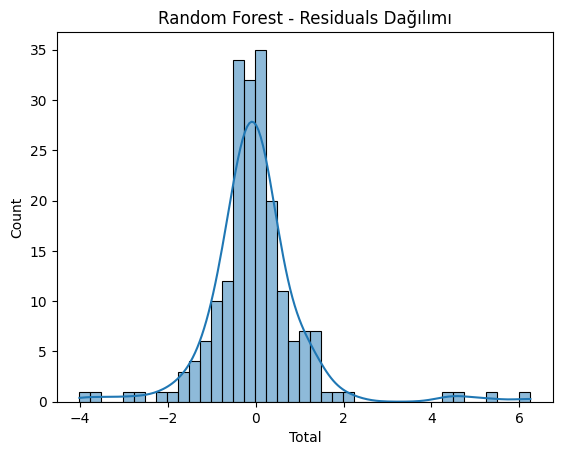

In [88]:
# Residuals Analizi - Random Forest
residuals_rf = y_test - y_pred_rf
sns.histplot(residuals_rf, kde=True)
plt.title('Random Forest - Residuals Dağılımı')
plt.show()

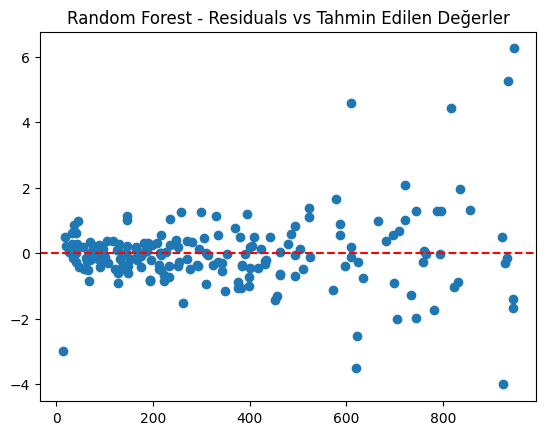

In [90]:
plt.scatter(y_pred_rf, residuals_rf)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Random Forest - Residuals vs Tahmin Edilen Değerler')
plt.show()

In [94]:
# ===================================================================
# 4. Polinomsal Regresyon Modeli
# ===================================================================
poly = PolynomialFeatures(degree=2)  # Dereceyi ihtiyaca göre değiştirebilirsiniz
X_poly = poly.fit_transform(X)

# Eğitim ve Test Setlerine Bölme (Polinomsal Regresyon için)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Polinomsal Regresyon Modeli
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_poly)
y_pred_poly = poly_model.predict(X_test_poly)
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)

print("\nPolinomsal Regresyon Modeli:")
print("MSE:", mse_poly)
print("R^2 Skoru:", r2_poly)


Polinomsal Regresyon Modeli:
MSE: 1.4797897777686283e-24
R^2 Skoru: 1.0


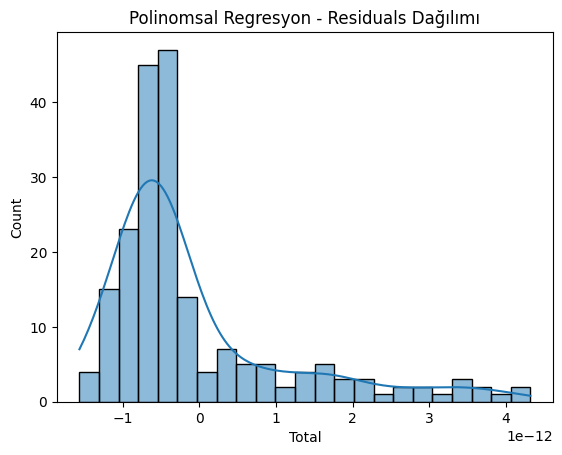

In [96]:
# Residuals Analizi - Polinomsal Regresyon
residuals_poly = y_test_poly - y_pred_poly
sns.histplot(residuals_poly, kde=True)
plt.title('Polinomsal Regresyon - Residuals Dağılımı')
plt.show()

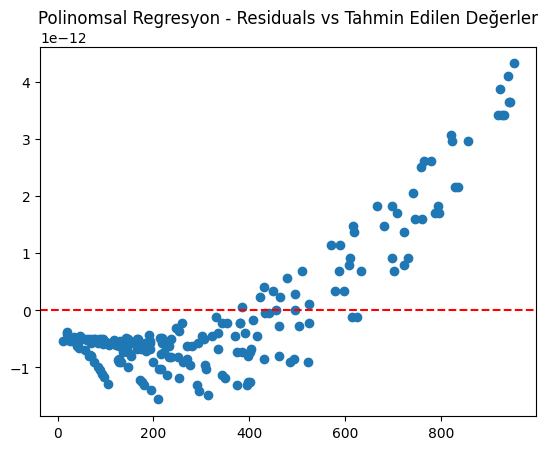

In [98]:
plt.scatter(y_pred_poly, residuals_poly)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Polinomsal Regresyon - Residuals vs Tahmin Edilen Değerler')
plt.show()

In [100]:
# ===================================================================
# Genel Sonuçlar ve Performans Karşılaştırması
# ===================================================================
print("\nModel Karşılaştırma:")
print(f"Lineer Regresyon - R^2 Skoru: {r2_linear}, MSE: {mse_linear}")
print(f"Ridge Regresyon - R^2 Skoru: {r2_ridge}, MSE: {mse_ridge}")
print(f"Random Forest - R^2 Skoru: {r2_rf}, MSE: {mse_rf}")
print(f"Polinomsal Regresyon - R^2 Skoru: {r2_poly}, MSE: {mse_poly}")


Model Karşılaştırma:
Lineer Regresyon - R^2 Skoru: 1.0, MSE: 2.079658227216049e-26
Ridge Regresyon - R^2 Skoru: 0.999999999999996, MSE: 2.5921997730035625e-10
Random Forest - R^2 Skoru: 0.9999813532882689, MSE: 1.2131365367204707
Polinomsal Regresyon - R^2 Skoru: 1.0, MSE: 1.4797897777686283e-24
